# Progetto *Applicazioni Data Intensive*
Alessandro Marcantoni  
alessandr.marcanton2@studio.unibo.it  
Matricola: 839160  
AA. 2019/2020

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Descrizione del problema
Il dataset in esame contiene informazioni utili per la classificazione di funghi in *commestibili* o *velenosi*.  
Tali informazioni riguardano le caratteristiche di 8000 funghi. L'obiettivo del problema è perciò quello di predire una variabile discreta binaria.

In [ ]:
import os.path
if not os.path.exists("mushrooms.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://www.openml.org/data/get_csv/24/dataset_24_mushroom.arff", "mushrooms.csv")

mushrooms = pd.read_csv("mushrooms.csv")

## Comprensione dei dati

Osserviamo che nel dataset sono presenti più di 8000 istanze e 23 feature.

In [ ]:
print("Numero istanze:", mushrooms.shape[0])
print("Numero feature:", mushrooms.shape[1])

Numero istanze: 8124
Numero feature: 23


In [ ]:
mushrooms.head(10)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,'x','s','n','t','p','f','c','n','k','e','e','s','s','w','w','p','w','o','p','k','s','u','p'
1,'x','s','y','t','a','f','c','b','k','e','c','s','s','w','w','p','w','o','p','n','n','g','e'
2,'b','s','w','t','l','f','c','b','n','e','c','s','s','w','w','p','w','o','p','n','n','m','e'
3,'x','y','w','t','p','f','c','n','n','e','e','s','s','w','w','p','w','o','p','k','s','u','p'
4,'x','s','g','f','n','f','w','b','k','t','e','s','s','w','w','p','w','o','e','n','a','g','e'
5,'x','y','y','t','a','f','c','b','n','e','c','s','s','w','w','p','w','o','p','k','n','g','e'
6,'b','s','w','t','a','f','c','b','g','e','c','s','s','w','w','p','w','o','p','k','n','m','e'
7,'b','y','w','t','l','f','c','b','n','e','c','s','s','w','w','p','w','o','p','n','s','m','e'
8,'x','y','w','t','p','f','c','n','p','e','e','s','s','w','w','p','w','o','p','k','v','g','p'
9,'b','s','y','t','a','f','c','b','g','e','c','s','s','w','w','p','w','o','p','k','s','m','e'


Nello specifico, le features presenti (come si evince anche dalla rappresentazione delle prime istanze del dataset) sono: 
* **cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
* **cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s 
* **cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
* **bruises?**: bruises=t,no=f 
* **odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
* **gill-attachment**: attached=a,descending=d,free=f,notched=n 
* **gill-spacing**: close=c,crowded=w,distant=d 
* **gill-size**: broad=b,narrow=n 
* **gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
* **stalk-shape**: enlarging=e,tapering=t 
* **stalk-root**: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
* **stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s 
* **stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s 
* **stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
* **stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
* **veil-type**: partial=p,universal=u 
* **veil-color**: brown=n,orange=o,white=w,yellow=y 
* **ring-number**: none=n,one=o,two=t 
* **ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
* **spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
* **population**: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
* **habitat**: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

La variabile target è invece ```class``` che, come anticipato, è binaria e può assumere i seguenti valori:  
* ```'e'```: il fungo è commestibile
* ```'p'```: il fungo è velenoso.

## Analisi esplorativa

In [ ]:
mushrooms.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7,2
top,'x','y','n','f','n','f','c','b','b','t','b','s','s','w','w','p','w','o','p','w','v','d','e'
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


Le feature sono tutte di tipo categorico perciò dalla descrizione del dataset si evincono:  
* il numero di categorie per feature. 
* la categoria più frequente
* la sua frequenza.  

Un altro indicatore che otteniamo, ed è molto importante, è il ```count``` per ogni feature: da questo valore possiamo notare che non vi sono feature mancanti e perciò si può procedere senza eliminare istanze. Possiamo ottenere questo indicatore anche in altri modi, come mostrato di seguito.

### Rilevazione di eventuali valori nulli

In [ ]:
mushrooms.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

### Verifica bilanciamento classi

Mostriamo poi mediante un grafico a torta che la variabile target ```class``` risulta essere accettabilmente bilanciata, ovvero le istanze sono ripartite in modo simile tra le due classi.  
Il problema risulta essere perciò bilanciato e non è necessario utilizzare delle tecniche di bilanciamento (*data augmentation*, ecc).

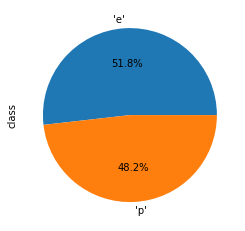

In [ ]:
mushrooms['class'].value_counts().plot.pie(autopct='%1.1f%%');

### Data cleaning

Come già detto, non vi sono valori mancanti perciò non è necessario rimuovere istanze. Inoltre, essendo le feature tutte categoriche, non vi sono particolari valori da controllare.

## Data exploration

Visualizziamo con dei grafici a torta le distribuzione di tutte le variabili, che ricordiamo essere categoriche, del dataset.

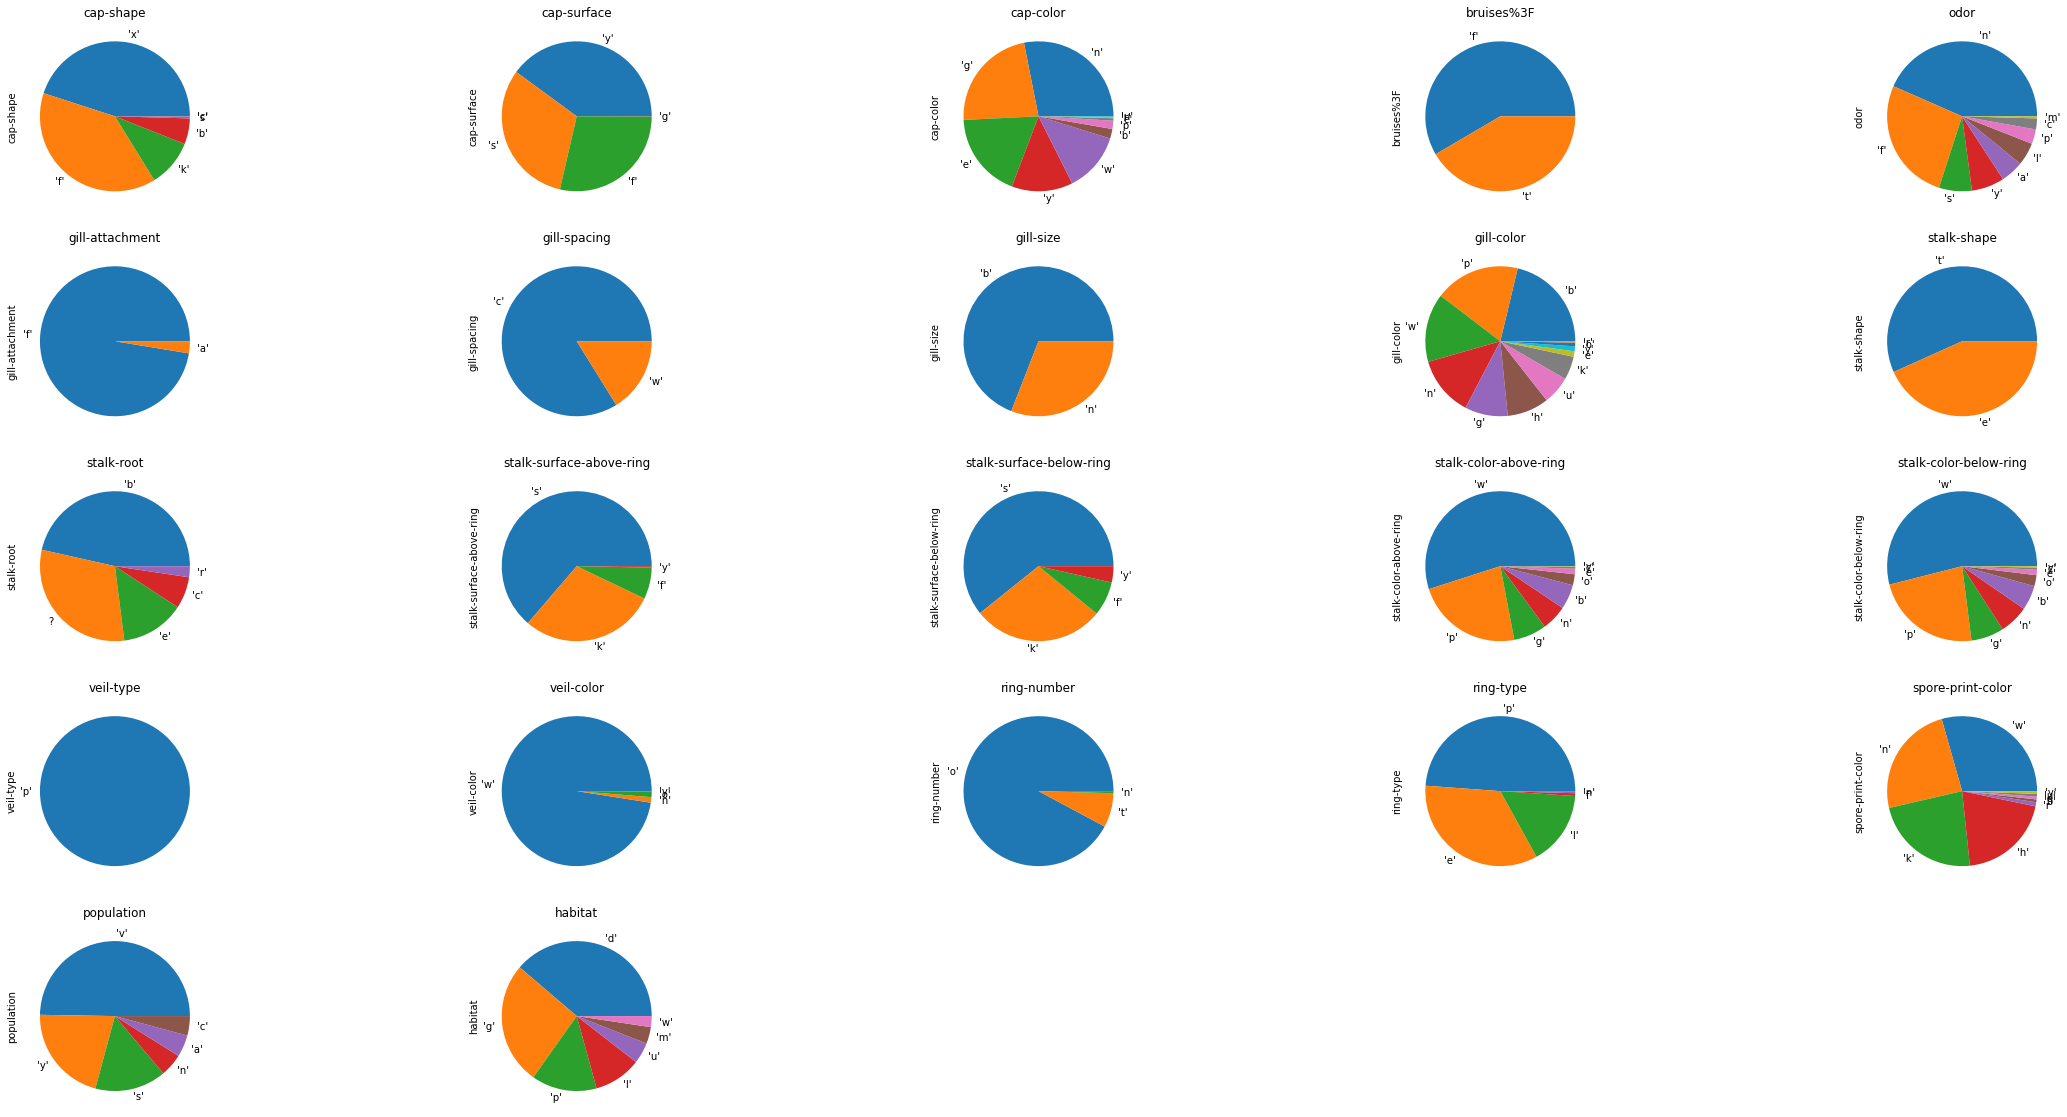

In [ ]:
plot = plt.figure(figsize=(40, 20))

for n, column in enumerate(mushrooms.columns[:-1]):
  plt.subplot(5, 5, n+1)
  plt.title(column)
  mushrooms[column].value_counts().plot.pie()

plt.show()

Dai grafici possiamo notare che la maggior parte (talvolta la totalità) degli esemplari considerati hanno ```veil-type``` ```partial``` e ```veil.color``` ```white```, ```gill attachment``` ```free```, ```gill-spacing``` ```close``` e ```ring-numero``` ```one```. Perciò avranno un velo parziale e di colore bianco, delle lamelle con attacco libero e ravvicinate e un anello intorno al gambo.

Risulta utile analizzare anche alcune feature in relazione alla variabile target.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


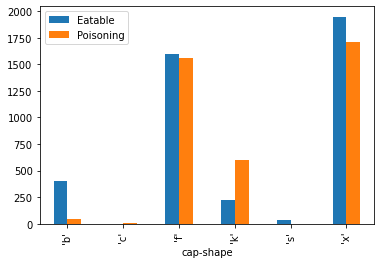

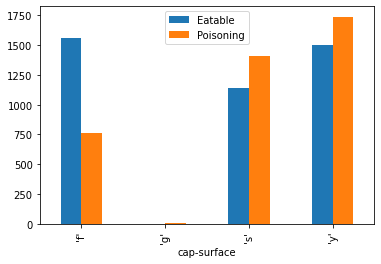

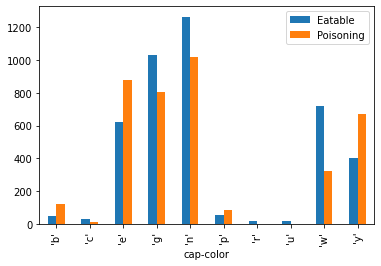

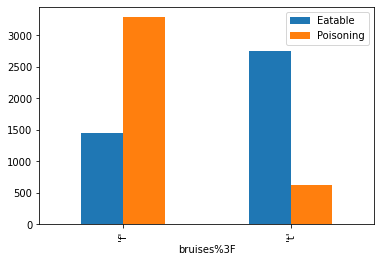

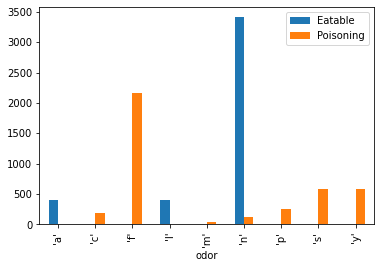

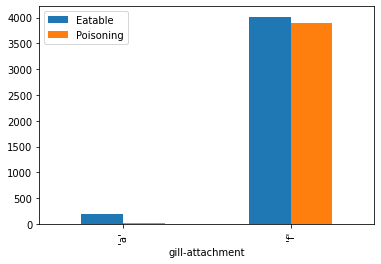

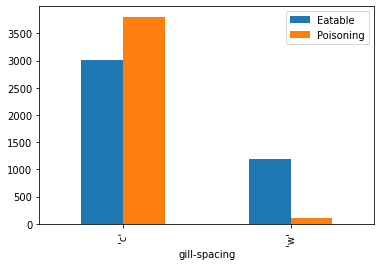

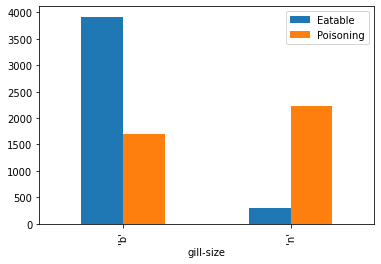

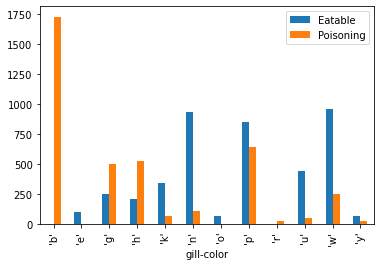

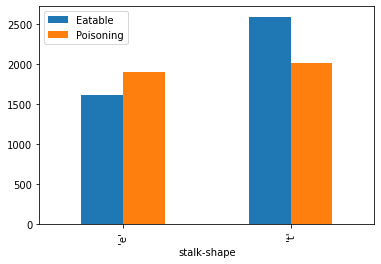

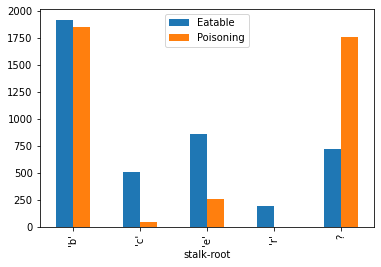

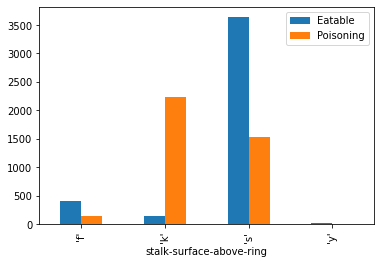

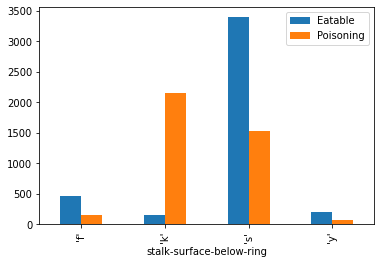

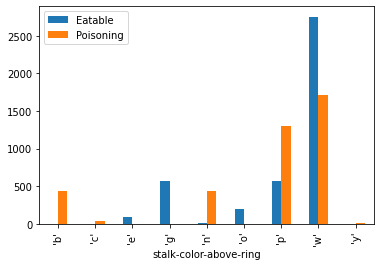

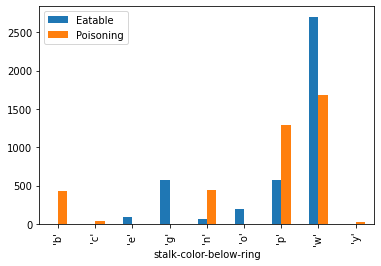

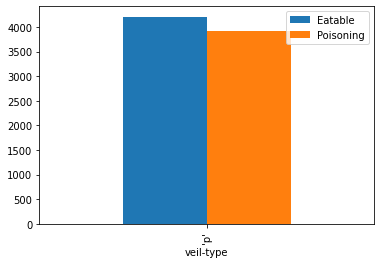

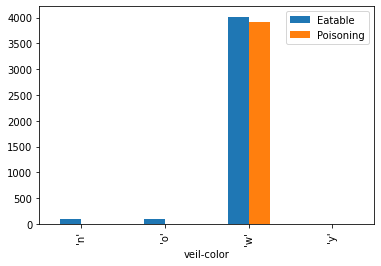

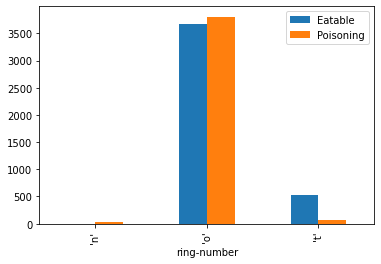

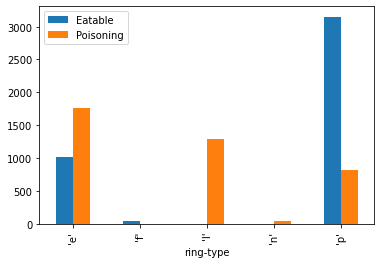

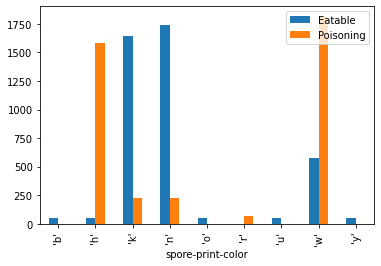

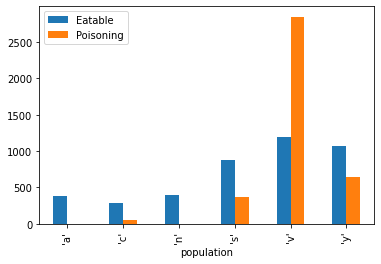

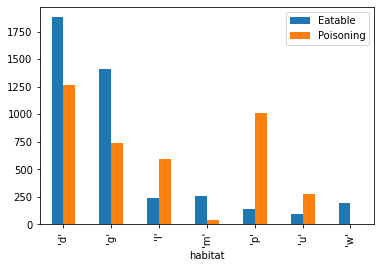

In [ ]:
for n, category in enumerate(mushrooms.columns[:-1]):
  group = mushrooms.pivot_table(index=category, columns="class", aggfunc="count")
  group.iloc[:, [0, 1]].plot.bar(legend=None);
  plt.legend(["Eatable", "Poisoning"]);

Dai grafici notiamo che la feature che più di tutte è utile a determinare se il fungo è commestibile o velenoso è ```odor```. Vediamo infatti come, in quasi tutti i casi, ad ogni odore sia associata una sola classe. Altre feature che appaiono significative sono ```ring-type``` e ```stalk-color-above-ring```.  
In particolare, sembra che gli odori ```creosote```, ```foul```, ```musty```, ```pungent```, ```spycy``` e ```fishy```, i tipi di anello ```large``` e ```none``` e i colori del gambo sopra l'anello ```brown```, ```cinnamon``` e ```yellow``` siano indicatori di funghi velenosi. Al contrario, gli odori ```almond``` e ```anise```, i tipi di anello ```flaring``` e i colori del gambo sopra l'anello ```red```, ```gray``` e ```orange``` sembrerebbero essere indicatori di funghi commestibili.

## Operazioni sui dati

Procediamo a trasformare le feature categoriche in feature binarie: ogni categoria di ogni feature verrà convertita in una feature stessa in modo da ottenere delle feature binarie. Avremo quindi per ogni colonna del dataset valori ```0``` se l'istanza non presenta la feature presa in esame o ```1``` se invece la possiede. Ovviamente per ogni gruppo di feature correlate vi potrà essere solo un valore ```1``` (es. Tra tutte le colonne che riguardano ```cap-shape```, solo una presenterà il valore ```1``` mentre tutte le altre varranno ```0```).

Procediamo inoltre a trasformare la variabile target. Questa assumerà infatti valore:
* ```0``` per la classe ```Eatable```
* ```1``` per la classe ```Poisoning```.

In [ ]:
data = mushrooms.drop(mushrooms.columns[:-1], axis=1)
data["class"] = np.where(data["class"] == "'p'", 1, 0)
for category in mushrooms.columns[:-1]:
  for value in mushrooms[category].value_counts().keys():
    data[category+"_"+value] = np.where(mushrooms[category] == value, 1, 0)

In [ ]:
data.head(10)

,class,cap-shape_'x',cap-shape_'f',cap-shape_'k',cap-shape_'b',cap-shape_'s',cap-shape_'c',cap-surface_'y',cap-surface_'s',cap-surface_'f',cap-surface_'g',cap-color_'n',cap-color_'g',cap-color_'e',cap-color_'y',cap-color_'w',cap-color_'b',cap-color_'p',cap-color_'c',cap-color_'r',cap-color_'u',bruises%3F_'f',bruises%3F_'t',odor_'n',odor_'f',odor_'s',odor_'y',odor_'a',odor_'l',odor_'p',odor_'c',odor_'m',gill-attachment_'f',gill-attachment_'a',gill-spacing_'c',gill-spacing_'w',gill-size_'b',gill-size_'n',gill-color_'b',gill-color_'p',...,stalk-color-below-ring_'b',stalk-color-below-ring_'o',stalk-color-below-ring_'e',stalk-color-below-ring_'c',stalk-color-below-ring_'y',veil-type_'p',veil-color_'w',veil-color_'n',veil-color_'o',veil-color_'y',ring-number_'o',ring-number_'t',ring-number_'n',ring-type_'p',ring-type_'e',ring-type_'l',ring-type_'f',ring-type_'n',spore-print-color_'w',spore-print-color_'n',spore-print-color_'k',spore-print-color_'h',spore-print-color_'r',spore-print-color_'b',spore-print-color_'o',spore-print-color_'u',spore-print-color_'y',population_'v',population_'y',population_'s',population_'n',population_'a',population_'c',habitat_'d',habitat_'g',habitat_'p',habitat_'l',habitat_'u',habitat_'m',habitat_'w'
0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


## Divisione dei dati

Vi sono diverse tecniche per suddividere i dati. Ad esempio, alcuni preferiscono utilizzare *training set*, *validation set* e *test set*. In questo caso però verrà utilizzata una divisione in *training set* e *validation set*, come visto a lezione, in cui la ricerca degli **iperparametri** migliori sarà effettuata sfruttando la ```KCrossFoldValidation```.

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(["class"], axis=1)
y = data["class"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
len(X_train), len(X_val)

(6093, 2031)

È buona norma verificare che le classi di training risultino bilanciate e che abbiano una suddivisione simile a quella dell'intero dataset.

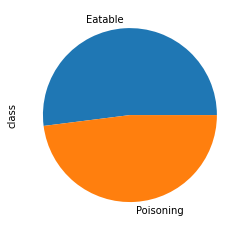

In [ ]:
y_train.value_counts().plot.pie(labels=["Eatable", "Poisoning"]);

## Individuazione feature più rilevanti

Di seguito viene applicata la regolarizzazione ```L1 - Lasso``` per determinare le feature più rilevanti. Questo tipo di regolarizzazione permette infatti di annullare il contributo delle feature meno rilevanti, mantenendo di fatto solo quelle che apportano un contributo più significativo.  
Questo approccio è particolarmente utile e importante nel caso in cui il dataset presenti un numero elevato di feature poiché, considerando solo le più rilevanti, permette di diminuire sensibilmente il carico computazionale mantenendo comunque un'accuratezza del modello alta.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="saga", random_state=42, penalty="l1", C=0.002)
model.fit(X_train, y_train)

LogisticRegression(C=0.002, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_val, y_val)

0.879862136878385

In [ ]:
values = model.coef_[0] != 0
significant = pd.Series(model.coef_[0], X.columns).keys()[values]
pd.Series(model.coef_[0], X.columns)[values]

bruises%3F_'f'    0.015038
bruises%3F_'t'   -0.017581
odor_'n'         -1.938044
ring-type_'p'    -0.240166
dtype: float64

Abbiamo quindi addestrato un modello di regressione logistica tramite ```LogisticRegression``` a cui abbiamo applicato, come già detto, una regolarizzazione di tipo ```L1``` intensa. Questo ci ha permesso di individuare le feature che sono maggiormente significative per questo dominio.  
Come ci aspettavamo, sono presenti alcune delle feature che prima avevamo identificato come importanti ai fini del problema: ```odor``` e ```ring-type```.  
Da notare il fatto che, sebbene il modello stia considerando solo poche feature, l'accuratezza sia già molto alta. Ciò significa che queste feature prese in considerazione sono già sufficienti per ottenere un risultato tutto sommato accettabile.

## Nuova suddivisione dei dati

Eseguiamo una nuova suddivisione dei dati che prende in considerazione solo le feature più significative.

In [ ]:
X = data[significant]
y = data["class"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.head(10)

,bruises%3F_'f',bruises%3F_'t',odor_'n',ring-type_'p'
3887,1,0,0,1
4119,1,0,0,0
1600,0,1,1,1
4988,1,0,0,0
6757,1,0,0,0
3128,0,1,1,1
5891,1,0,0,0
6838,1,0,0,0
4617,1,0,0,0
3761,0,1,1,1


## Generazione modelli

Di seguito proviamo a generare diversi modelli di learning sfruttando le tecniche di ```GridSearch``` e ```KCrossFoldValidation``` che permettono di individuare i **modelli** e i relativi **iperparametri** migliori in modo corretto.

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Perceptron

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

Eseguiamo una ```StratifiedKFold```, ovvero un particolare tipo di suddivisione ```KCrossFoldValidation```.  
La ```KCrossFoldValidation``` permette di suddividere il *training set* in ```K``` parti e, ad ogni iterazione, una di queste parti fungerà da *validation set*. È una tecnica molto utilizzata per il tuning degli **iperparametri** poiché permette di evitare risultati ottimistici che si otterrebbero provando il modello sugli stessi dati utilizzati per il tuning.  
La ```StratifiedKFold``` garantisce inoltre uguale distribuzione delle classi di output all'interno dei fold. Questo è molto importante durante l'addestramento di un modello di classificazione. 

In [ ]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)

### Perceptron

Uno dei primi approcci alla classificazione visti è sicuramente il ```Perceptron```. È un algoritmo semplice: i parametri vengono inizialmente impostati in modo casuale, poi viene iterato il training set e, per ogni istanza classificata in modo errato, i parametri vengono aggiornati in modo proporzionale alle feature dell'istanza stessa.

Di seguito viene dichiarata una ```Pipeline```, particolarmente comoda nel caso in cui siano applicate trasformazioni di **standardizzazione** delle feature o **trasformazioni polinomiali**.  
In questo caso, vogliamo andare a testare i seguenti iperparametri:
* ```StandardScaler```, ovvero la standardizzazione delle feature. Questa tecnica risulta molto efficace quando vi sono all'interno del dataset valori che appartengono a domini di ordini di grandezza diversi;
* Regolarizzazione di tipo ```l1```, ```l2``` ed ```elasticnet```, cioè una combinazione delle precedenti, con varie intensità.

In [ ]:
perceptron = Pipeline([
    ("scale", None),
    ("regr", Perceptron(shuffle=True, random_state=5))
])

grid_perceptron = [
  {
    "scale": [None, StandardScaler()],
    "regr__penalty": [None]
  },
  {
    "scale": [None, StandardScaler()],
    "regr__penalty": ["l1", "l2", "elasticnet"],
    "regr__alpha": [0.001, 0.01, 0.1]
  }
]

gs_perceptron = GridSearchCV(estimator=perceptron, param_grid=grid_perceptron, cv=skf)
gs_perceptron.fit(X_train, y_train)
gs_perceptron.best_params_

{'regr__penalty': None,
 'scale': StandardScaler(copy=True, with_mean=True, with_std=True)}

Come si può notare, il modello che ha ottenuto il punteggio migliore presenta i seguenti iperparametri:
* Nessuna regolarizzazione;
* Nessuna standardizzazione.

Stampiamo successivamente anche i parametri che questo modello ha ricavato durante la fase di training.

In [ ]:
pd.DataFrame(gs_perceptron.cv_results_).sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__penalty,param_scale,param_regr__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.006596,0.000583,0.001152,0.000053,None,"StandardScaler(copy=True, with_mean=True, with...",NaN,"{'regr__penalty': None, 'scale': StandardScale...",0.899918,0.890074,0.923708,0.922003,0.924466,0.912034,0.014278,1
6,0.006347,0.000948,0.000964,0.000033,elasticnet,None,0.001,"{'regr__alpha': 0.001, 'regr__penalty': 'elast...",0.907301,0.890074,0.905660,0.922003,0.924466,0.909901,0.012462,2
4,0.005527,0.000620,0.000948,0.000018,l2,None,0.001,"{'regr__alpha': 0.001, 'regr__penalty': 'l2', ...",0.907301,0.890074,0.905660,0.922003,0.924466,0.909901,0.012462,2


In [ ]:
print("  Training score:", gs_perceptron.score(X_train, y_train))
print("Validation score:", gs_perceptron.score(X_val, y_val))

  Training score: 0.8890530116527162
Validation score: 0.879862136878385


#### Matrice di confusione

La valutazione di un modello di classificazione si ricerca sfruttando la ```confusion matrix```: una matrice che ha sulle righe le classi reali, sulle colonne le classi predette e in ogni cella vi è il numero di istanze della classe ```x``` classificate appartenenti alla classe ```y```.  
A partire dalla ```confusion matrix``` si ottengono diversi indicatori:
* ```precision score```: indica la percentuale di istanze classificate come ```y``` che sono realmente tali;
* ```recall score```: indica la percentuale di istanze realmente della classe ```x``` che vengono classificate correttamente.
* ```f1 score```: rappresenta la media armonica dei due indicatori precedenti.

Definiamo una funzione per fare il plot della ```confusion matrix```.

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label'.format(accuracy, misclass))
    plt.show()

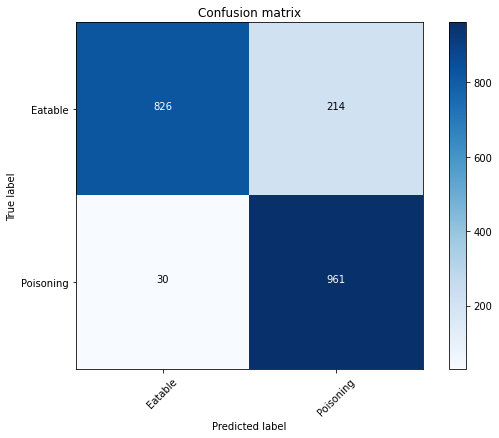

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, gs_perceptron.predict(X_val))
plot_confusion_matrix(cm, target_names=['Eatable', 'Poisoning'], normalize=False)

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

print("  Precision Eatable:", precision_score(y_val, gs_perceptron.predict(X_val), pos_label=0))
print("Precision Poisoning:", precision_score(y_val, gs_perceptron.predict(X_val), pos_label=1), "\n")
print("     Recall Eatable:", recall_score(y_val, gs_perceptron.predict(X_val), pos_label=0))
print("   Recall Poisoning:", recall_score(y_val, gs_perceptron.predict(X_val), pos_label=1), "\n")
print("           F1-score:", f1_score(y_val, gs_perceptron.predict(X_val), average="macro"))

  Precision Eatable: 0.9649532710280374
Precision Poisoning: 0.8178723404255319 

     Recall Eatable: 0.7942307692307692
   Recall Poisoning: 0.9697275479313825 

           F1-score: 0.8793289853547926


#### Intervallo di confidenza

In [ ]:
def conf_interval(a, N, Z=1.96):
    c = (2 * N * a + Z**2) / (2 * (N + Z**2))
    d = Z * np.sqrt(Z**2 + 4*N*a - 4*N*a**2) / (2 * (N + Z**2))
    return c - d, c + d

In [ ]:
confidence = 95;
lower, upper = conf_interval(gs_perceptron.score(X_val, y_val), len(y_val))
print("Interval with confidence {}%:".format(confidence))
print("Lower: {:.4f}%".format(lower*100))
print("Upper: {:.4f}%".format(upper*100))

Interval with confidence 95%:
Lower: 86.5000%
Upper: 89.3290%


### Logistic Regression

La ```LogisticRegression``` è considerata la versione moderna del ```Perceptron```. È basata sulla regressione lineare poiché minimizza una funzione di costo mediante discesa sul gradiente.

Anche in questo caso vengono create una ```Pipeline``` e una ```grid``` che consentirà di andare a testare i seguenti iperparametri:
* Standardizzazione mediante ```StandardScaler```;
* Regolarizzazione di tipo ```l1```, ```l2```, ```elasticnet``` con vari gradi di intensità;
* Nel caso di regolarizzazione ```elasticnet``` si manipola anche il ratio tra ```l1``` e ```l2```.

In [ ]:
logistic = Pipeline([
    ("scale", None),
    ("regr", LogisticRegression(solver="saga"))
])

grid_logistic = [
  {
    "scale": [None, StandardScaler()],
    "regr__penalty": ["none"]
  },
  {
    "scale": [None, StandardScaler()],
    "regr__penalty": ["l1", "l2"],
    "regr__C": [0.001, 0.01, 0.1]
  },
  {
    "scale": [None, StandardScaler()],
    "regr__penalty": ["elasticnet"],
    "regr__C": [0.001, 0.01, 0.1],
    "regr__l1_ratio": [0.25, 0.5, 0.75]
  }
]

gs_logistic = GridSearchCV(estimator=logistic, param_grid=grid_logistic, cv=skf)
gs_logistic.fit(X_train, y_train)
gs_logistic.best_params_

{'regr__penalty': 'none', 'scale': None}

Di nuovo, il modello che ha ottenuto il punteggio migliore presenta i seguenti iperparametri:
* Nessuna regolarizzazione;
* Nessuna standardizzazione.

Stampiamo successivamente anche i parametri che questo modello ha ricavato durante la fase di training.

In [ ]:
pd.DataFrame(gs_logistic.cv_results_).sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__penalty,param_scale,param_regr__C,param_regr__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043644,0.059011,0.001138,0.000101,none,None,NaN,NaN,"{'regr__penalty': 'none', 'scale': None}",0.907301,0.926169,0.923708,0.922003,0.924466,0.92073,0.006846,1
29,0.014939,0.000797,0.001215,0.000080,elasticnet,"StandardScaler(copy=True, with_mean=True, with...",0.1,0.5,"{'regr__C': 0.1, 'regr__l1_ratio': 0.5, 'regr_...",0.907301,0.926169,0.923708,0.922003,0.924466,0.92073,0.006846,1
28,0.012847,0.001264,0.001042,0.000067,elasticnet,None,0.1,0.5,"{'regr__C': 0.1, 'regr__l1_ratio': 0.5, 'regr_...",0.907301,0.926169,0.923708,0.922003,0.924466,0.92073,0.006846,1


In [ ]:
print("  Training score:", gs_logistic.score(X_train, y_train))
print("Validation score:", gs_logistic.score(X_val, y_val))

  Training score: 0.9207287050713934
Validation score: 0.9108813392417529


#### Matrice di confusione

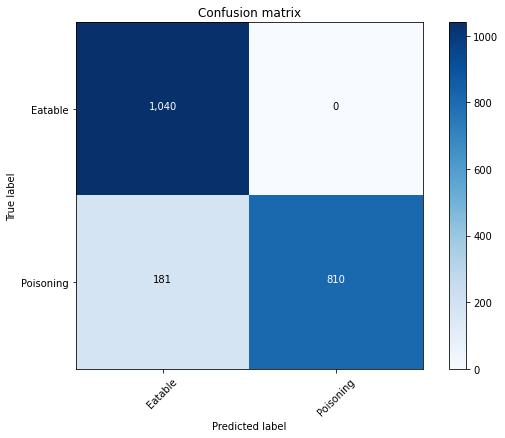

In [ ]:
cm = confusion_matrix(y_val, gs_logistic.predict(X_val))
plot_confusion_matrix(cm, target_names=['Eatable', 'Poisoning'], normalize=False)

In [ ]:
print("  Precision Eatable:", precision_score(y_val, gs_logistic.predict(X_val), pos_label=0))
print("Precision Poisoning:", precision_score(y_val, gs_logistic.predict(X_val), pos_label=1), "\n")
print("     Recall Eatable:", recall_score(y_val, gs_logistic.predict(X_val), pos_label=0))
print("   Recall Poisoning:", recall_score(y_val, gs_logistic.predict(X_val), pos_label=1), "\n")
print("           F1-score:", f1_score(y_val, gs_logistic.predict(X_val), average="macro"))

  Precision Eatable: 0.8517608517608518
Precision Poisoning: 1.0 

     Recall Eatable: 1.0
   Recall Poisoning: 0.8173562058526741 

           F1-score: 0.9097236018812096


#### Intervallo di confidenza

In [ ]:
lower, upper = conf_interval(gs_logistic.score(X_val, y_val), len(y_val))
print("Interval with confidence {}%:".format(confidence))
print("Lower: {:.4f}%".format(lower*100))
print("Upper: {:.4f}%".format(upper*100))

Interval with confidence 95%:
Lower: 89.7702%
Upper: 92.2509%


### Perceptron con feature polinomiali

Può essere interessante anche valutare i modelli basati sulle trasformazioni polinomiali delle feature, perciò di seguito eseguiamo delle prove, del tutto analoghe alle precedenti, con la differenza che questa volta vi sarà l'introduzione di ```PolynomialFeatures```.

In [ ]:
perceptron_poly = Pipeline([
    ("scale", None),
    ("poly", PolynomialFeatures()),
    ("regr", Perceptron(shuffle=True, random_state=5))
])

grid_perceptron_poly = [
  {
    "scale": [None, StandardScaler()],
    "poly__degree": [2, 3],
    "regr__penalty": [None]
  },
  {
    "scale": [None, StandardScaler()],
    "poly__degree": [2, 3],
    "regr__penalty": ["l1", "l2", "elasticnet"],
    "regr__alpha": [0.001, 0.01, 0.1]
  }
]

gs_perceptron_poly = GridSearchCV(estimator=perceptron_poly, param_grid=grid_perceptron_poly, cv=skf)
gs_perceptron_poly.fit(X_train, y_train)
gs_perceptron_poly.best_params_

{'poly__degree': 3,
 'regr__penalty': None,
 'scale': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [ ]:
pd.DataFrame(gs_perceptron_poly.cv_results_).sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_regr__penalty,param_scale,param_regr__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.016031,0.003094,0.002480,0.000172,3,None,"StandardScaler(copy=True, with_mean=True, with...",NaN,"{'poly__degree': 3, 'regr__penalty': None, 'sc...",0.907301,0.890074,0.923708,0.922003,0.924466,0.91351,0.013296,1
8,0.014752,0.001867,0.001907,0.000029,2,elasticnet,None,0.001,"{'poly__degree': 2, 'regr__alpha': 0.001, 'reg...",0.907301,0.890074,0.923708,0.922003,0.924466,0.91351,0.013296,1
6,0.012824,0.003655,0.002084,0.000142,2,l2,None,0.001,"{'poly__degree': 2, 'regr__alpha': 0.001, 'reg...",0.907301,0.890074,0.923708,0.922003,0.924466,0.91351,0.013296,1


In [ ]:
print("  Training score:", gs_perceptron_poly.score(X_train, y_train))
print("Validation score:", gs_perceptron_poly.score(X_val, y_val))

  Training score: 0.9207287050713934
Validation score: 0.9108813392417529


#### Matrice di confusione

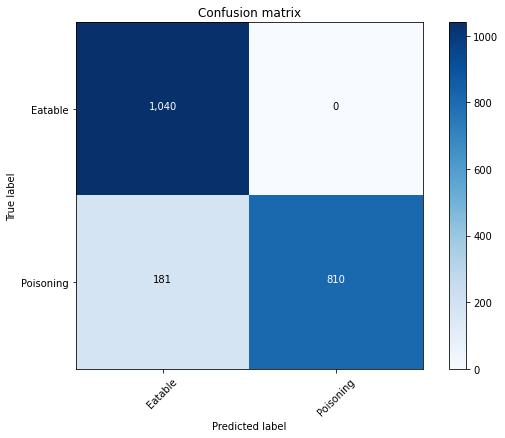

In [ ]:
cm = confusion_matrix(y_val, gs_perceptron_poly.predict(X_val))
plot_confusion_matrix(cm, target_names=['Eatable', 'Poisoning'], normalize=False)

In [ ]:
print("  Precision Eatable:", precision_score(y_val, gs_perceptron_poly.predict(X_val), pos_label=0))
print("Precision Poisoning:", precision_score(y_val, gs_perceptron_poly.predict(X_val), pos_label=1), "\n")
print("     Recall Eatable:", recall_score(y_val, gs_perceptron_poly.predict(X_val), pos_label=0))
print("   Recall Poisoning:", recall_score(y_val, gs_perceptron_poly.predict(X_val), pos_label=1), "\n")
print("           F1-score:", f1_score(y_val, gs_perceptron_poly.predict(X_val), average="macro"))

  Precision Eatable: 0.8517608517608518
Precision Poisoning: 1.0 

     Recall Eatable: 1.0
   Recall Poisoning: 0.8173562058526741 

           F1-score: 0.9097236018812096


#### Intervallo di confidenza

In [ ]:
lower, upper = conf_interval(gs_perceptron_poly.score(X_val, y_val), len(y_val))
print("Interval with confidence {}%:".format(confidence))
print("Lower: {:.4f}%".format(lower*100))
print("Upper: {:.4f}%".format(upper*100))

Interval with confidence 95%:
Lower: 89.7702%
Upper: 92.2509%


### Logistic Regression con feature polinomiali

In [ ]:
logistic_poly = Pipeline([
    ("scale", None),
    ("poly", PolynomialFeatures()),
    ("regr", LogisticRegression(solver="saga", max_iter=1000))
])

grid_logistic_poly = [
  {
    "scale": [None, StandardScaler()],
    "poly__degree": [2, 3],
    "regr__penalty": ["none"]
  },
  {
    "scale": [None, StandardScaler()],
    "poly__degree": [2, 3],
    "regr__penalty": ["l1", "l2"],
    "regr__C": [0.001, 0.01, 0.1]
  },
  {
    "scale": [None, StandardScaler()],
    "poly__degree": [2, 3],
    "regr__penalty": ["elasticnet"],
    "regr__C": [0.001, 0.01, 0.1],
    "regr__l1_ratio": [0.25, 0.5, 0.75]
  }
]

gs_logistic_poly = GridSearchCV(estimator=logistic_poly, param_grid=grid_logistic_poly, cv=skf)
gs_logistic_poly.fit(X_train, y_train)
gs_logistic_poly.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

{'poly__degree': 2, 'regr__penalty': 'none', 'scale': None}

In [ ]:
pd.DataFrame(gs_logistic_poly.cv_results_).sort_values("rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_regr__penalty,param_scale,param_regr__C,param_regr__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.180513,0.009796,0.002244,0.000031,2,none,None,NaN,NaN,"{'poly__degree': 2, 'regr__penalty': 'none', '...",0.907301,0.926169,0.923708,0.922003,0.924466,0.92073,0.006846,1
29,0.040203,0.003053,0.002360,0.000020,2,elasticnet,"StandardScaler(copy=True, with_mean=True, with...",0.001,0.25,"{'poly__degree': 2, 'regr__C': 0.001, 'regr__l...",0.907301,0.926169,0.923708,0.922003,0.924466,0.92073,0.006846,1
62,0.312711,0.009420,0.002201,0.000039,3,elasticnet,None,0.1,0.75,"{'poly__degree': 3, 'regr__C': 0.1, 'regr__l1_...",0.907301,0.926169,0.923708,0.922003,0.924466,0.92073,0.006846,1


In [ ]:
print("  Training score:", gs_logistic_poly.score(X_train, y_train))
print("Validation score:", gs_logistic_poly.score(X_val, y_val))

  Training score: 0.9207287050713934
Validation score: 0.9108813392417529


#### Matrice di confusione

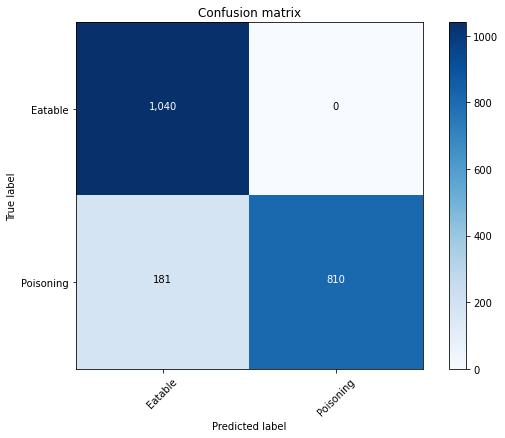

In [ ]:
cm = confusion_matrix(y_val, gs_logistic_poly.predict(X_val))
plot_confusion_matrix(cm, target_names=['Eatable', 'Poisoning'], normalize=False)

In [ ]:
print("  Precision Eatable:", precision_score(y_val, gs_logistic_poly.predict(X_val), pos_label=0))
print("Precision Poisoning:", precision_score(y_val, gs_logistic_poly.predict(X_val), pos_label=1), "\n")
print("     Recall Eatable:", recall_score(y_val, gs_logistic_poly.predict(X_val), pos_label=0))
print("   Recall Poisoning:", recall_score(y_val, gs_logistic_poly.predict(X_val), pos_label=1), "\n")
print("           F1-score:", f1_score(y_val, gs_logistic_poly.predict(X_val), average="macro"))

  Precision Eatable: 0.8517608517608518
Precision Poisoning: 1.0 

     Recall Eatable: 1.0
   Recall Poisoning: 0.8173562058526741 

           F1-score: 0.9097236018812096


#### Intervallo di confidenza

In [ ]:
lower, upper = conf_interval(gs_logistic_poly.score(X_val, y_val), len(y_val))
print("Interval with confidence {}%:".format(confidence))
print("Lower: {:.4f}%".format(lower*100))
print("Upper: {:.4f}%".format(upper*100))

Interval with confidence 95%:
Lower: 89.7702%
Upper: 92.2509%


Dai dati ottenuti, le trasformazioni polinomiali non sembrano apportare miglioramenti significativi ai modelli perciò, dato che richiedono una computazione più onerosa, si è deciso di non mantenerle.

## Valutazione dei modelli

Consideriamo quindi il miglior modello per ognuno dei due algoritmi, cioè i seguenti modelli:
* ```Perceptron```:
  * ```StandardScaler: StandardScaler(copy=True, with_mean=True, with_std=True)```;
  * ```PolynomialFeatures: None```;
  * ```Penalty: None```.

* ```LogisticRegression```:
  * ```StandardScaler: None```;
  * ```PolynomialFeatures: None```;
  * ```Penalty: None```.


#### Comparazione dei modelli

In [ ]:
def model_comparison(mse_1, mse_2):
  d = np.abs(mse_1 - mse_2)
  variance = (mse_1 * (1 - mse_1)) / len(X_val) + (mse_2 * (1 - mse_2)) / len(X_val)
  d_min = d - 1.96 * np.sqrt(variance)
  d_max = d + 1.96 * np.sqrt(variance)
  return (d_min, d_max)

In [ ]:
from sklearn.metrics import mean_squared_error

perc_mse = mean_squared_error(y_val, gs_perceptron.predict(X_val))
log_mse  = mean_squared_error(y_val, gs_logistic.predict(X_val))

lower, upper = model_comparison(perc_mse, log_mse)
print("Interval: [{:.4f}, {:.4f}]".format(lower, upper))

Interval: [0.0122, 0.0498]


I risultati ottenuti per i modelli in termini di ```accuracy``` e ```f1 score``` risultano essere abbastanza diversi e perciò ci si aspettava una differenza rilevante tra i due. Infatti, l'intervallo che si ottiene confrontandoli non contiene al suo interno il valore ```0``` e perciò la differenza tra i due modelli risulta essere statisticamente significativa.

Il modello migliore risulta quindi essere il seguente:
* ```LogisticRegression```:
  * ```StandardScaler: None```;
  * ```PolynomialFeatures: None```;
  * ```Penalty: None```.

Confrontiamo ora l'accuratezza del modello migliore con quella di un modello che esegue predizioni casuali

In [ ]:
import random

random.seed(42)

def random_prediction(data):
  return [random.randint(0, 1) for n in range(len(data))]

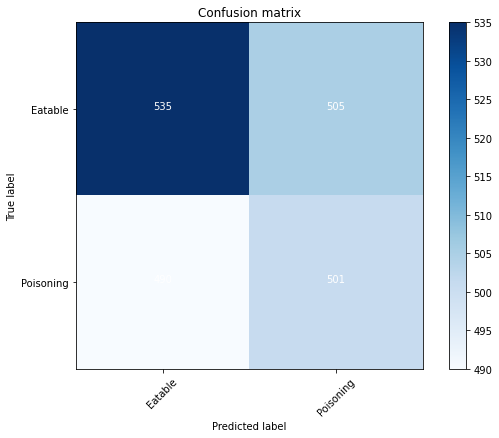

In [ ]:
cm = confusion_matrix(y_val, random_prediction(X_val))
plot_confusion_matrix(cm, target_names=['Eatable', 'Poisoning'], normalize=False)

In [ ]:
print("  Precision Eatable:", precision_score(y_val, random_prediction(X_val), pos_label=0))
print("Precision Poisoning:", precision_score(y_val, random_prediction(X_val), pos_label=1), "\n")
print("     Recall Eatable:", recall_score(y_val, random_prediction(X_val), pos_label=0))
print("   Recall Poisoning:", recall_score(y_val, random_prediction(X_val), pos_label=1), "\n")
print("           F1-score:", f1_score(y_val, random_prediction(X_val), average="macro"))

  Precision Eatable: 0.5118343195266272
Precision Poisoning: 0.5033881897386253 

     Recall Eatable: 0.5144230769230769
   Recall Poisoning: 0.4954591321897074 

           F1-score: 0.5075313036478086


Come si può osservare, l'accuratezza del modello casuale è di gran lunga inferiore a quella del modello ottenuto tramite ```LogisticRegression``` perciò quest'ultimo può essere considerato un buon modello.

È inoltre interessante considerare i parametri che questo modello ha costruito durante l'addestramento.

In [ ]:
pd.Series(gs_logistic.best_estimator_.named_steps["regr"].coef_[0], X_train.columns)

bruises%3F_'f'    2.179121
bruises%3F_'t'   -0.478976
odor_'n'         -5.999979
ring-type_'p'    -1.379246
dtype: float64

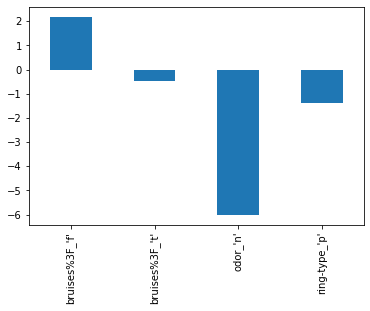

In [ ]:
pd.Series(gs_logistic.best_estimator_.named_steps["regr"].coef_[0], X_train.columns).plot.bar();

Osservando i parametri possiamo subito constatare che la feature che più di tutte influisce sulla scelta della classe di appartenenza è ```odor_'n'``` mentre quella che influisce meno è ```bruises%3F_'t'```. Inoltre possiamo dire che:
* ```bruises%3F_'f'``` tende a classificare l'istanza come ```Poisoning```.
* ```bruises%3F_'t'```, ```odor_'n'``` e ```ring-type_'p'``` tendono a classificare l'istanza come ```Eatable```.

### Rete neurale

Proviamo ora a risolvere lo stesso problema utilizzando una rete neurale di tipo ```Multilayer Perceptron```.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense

Definiamo una rete con due ```hidden layers```, ognuno dei quali presenta 10 neuroni e ha funzione di attivazione ```ReLU```.

In [ ]:
mlp = Sequential([
  InputLayer(input_shape=(4,)),               
  Dense(10, activation="relu"),
  Dense(10, activation="relu"),
  Dense(1, activation="sigmoid")
])

mlp.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = mlp.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Train on 6093 samples, validate on 2031 samples
Epoch 1/20
6093/6093 [==============================] - 0s 63us/step - loss: 0.4922 - accuracy: 0.8602 - val_loss: 0.2996 - val_accuracy: 0.9109
Epoch 2/20
6093/6093 [==============================] - 0s 47us/step - loss: 0.2179 - accuracy: 0.9207 - val_loss: 0.2001 - val_accuracy: 0.9109
Epoch 3/20
6093/6093 [==============================] - 0s 45us/step - loss: 0.1831 - accuracy: 0.9207 - val_loss: 0.1905 - val_accuracy: 0.9109
Epoch 4/20
6093/6093 [==============================] - 0s 46us/step - loss: 0.1778 - accuracy: 0.9207 - val_loss: 0.1880 - val_accuracy: 0.9109
Epoch 5/20
6093/6093 [==============================] - 0s 47us/step - loss: 0.1747 - accuracy: 0.9207 - val_loss: 0.1862 - val_accuracy: 0.9109
Epoch 6/20
6093/6093 [==============================] - 0s 46us/step - loss: 0.1738 - accuracy: 0.9207 - val_loss: 0.1856 - val_accuracy: 0.9109
Epoch 7/20
6093/6093 [==============================] - 0s 46us/step - loss: 0.173

In [ ]:
mlp.evaluate(X_val, y_val)[1]

2031/2031 [==============================] - 0s 31us/step


0.9108813405036926

Notiamo che, anche utilizzando un ```Multilayer Perceptron``` non superiamo l'accuratezza ottenuta dalla ```LogisticRegression```.